In [ ]:
#Library
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns


#KNN model
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#KMeans model
from sklearn.datasets import make_blobs

# **Pre-Processing**

## **Normalisasi**

In [ ]:
df = pd.read_csv('customer_data.csv')
df

,id;age;gender;income;education;region;loyalty_status;purchase_frequency;purchase_amount;product_category;promotion_usage;satisfaction_score
0,1;27;Male;40682;Bachelor;East;Gold;frequent;18...
1,2;29;Male;15317;Masters;West;Regular;rare;4557...
2,3;37;Male;38849;Bachelor;West;Silver;rare;1182...
3,4;30;Male;11568;HighSchool;South;Regular;frequ...
4,5;31;Female;46952;College;North;Regular;occasi...
...,...
76130,76131;22;Female;15407;HighSchool;North;Silver;...
76131,76132;31;Female;44914;Masters;West;Regular;rar...
76132,76133;34;Male;5885;Bachelor;West;Silver;rare;1...
76133,76134;34;Female;17482;Bachelor;North;Regular;r...


In [ ]:
df = pd.read_csv('customer_data.csv', delimiter=';')
df.to_csv('cus_data.csv', index=False)
df

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,31,Female,19691,College,West,Regular,occasional,7075,Health,0,7
99996,99997,36,Male,17428,HighSchool,South,Regular,rare,6873,Health,0,5
99997,99998,29,Male,13222,College,West,Regular,frequent,5152,Clothing,0,5
99998,99999,31,Female,40093,Bachelor,West,Regular,frequent,16312,Health,1,5


In [ ]:
df.shape

(100000, 12)

In [ ]:
df.dtypes

,0
id,int64
age,int64
gender,object
income,int64
education,object
region,object
loyalty_status,object
purchase_frequency,object
purchase_amount,int64
product_category,object


In [ ]:
def data_cleaning(data):
    data = missing_val(data)
    data = inconsisstant_inpu(data)
    data = duplikat(data)
    return data

def missing_val(df):
    print("Jumlah nilai hilang sebelum dihapus:")
    print(df.isnull().sum())
    df = df.dropna()
    print("Jumlah nilai hilang setelah dihapus:")
    print(df.isnull().sum())
    return df

def inconsisstant_inpu(df):
    for col in df.columns:
        if df[col].dtype == object:
            df[col] = df[col].str.strip().str.lower()
            print(df[col].unique())
    return df

def duplikat(df):
    df = df.drop_duplicates()
    return df

data_file = "cus_data.csv"
df = pd.read_csv(data_file)
cleaned_data = data_cleaning(df)
cleaned_data.to_csv("cus_data_bersih.csv", index=False)


Jumlah nilai hilang sebelum dihapus:
id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64
Jumlah nilai hilang setelah dihapus:
id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64
['male' 'female']
['bachelor' 'masters' 'highschool' 'college']
['east' 'west' 'south' 'north']
['gold' 'regular' 'silver']
['frequent' 'rare' 'occasional']
['books' 'clothing' 'food' 'electronics' 'home' 'beauty' 'health']


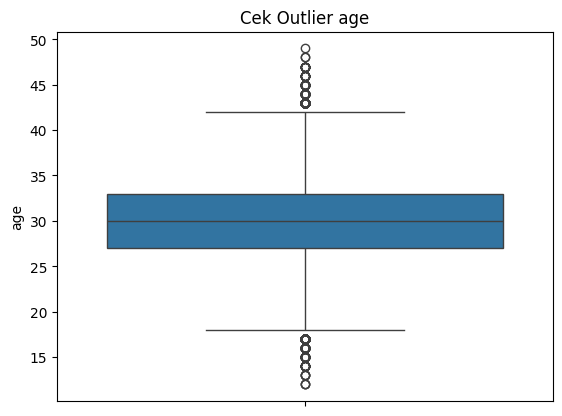

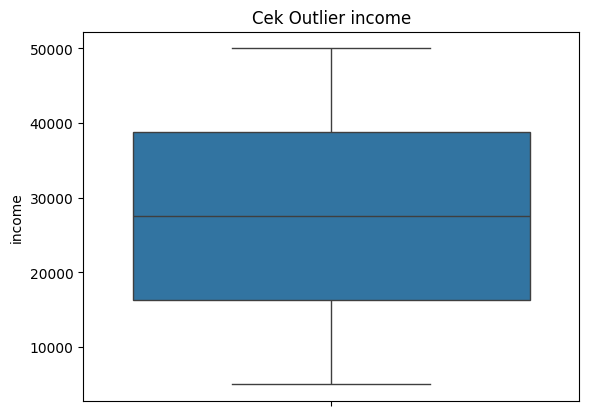

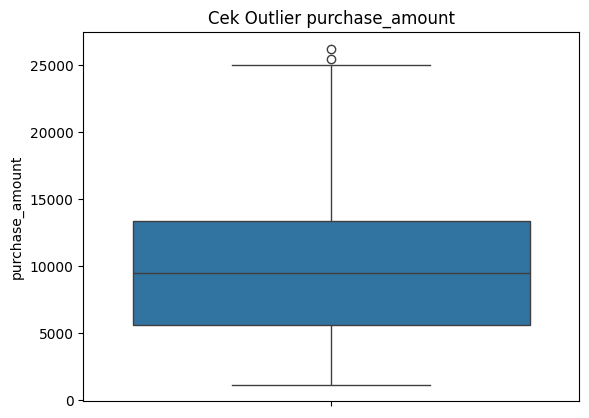

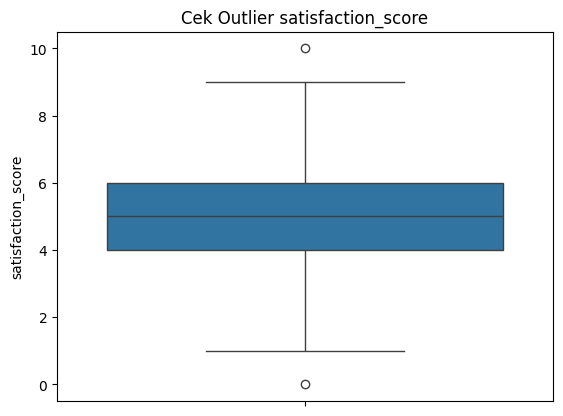

In [ ]:
df = pd.read_csv("cus_data_bersih.csv")
fitur = ['age', 'income', 'purchase_amount', 'satisfaction_score']

for feature in fitur:
    sns.boxplot(y=df[feature])
    plt.title(f"Cek Outlier {feature}")
    plt.ylabel(feature)
    plt.show()

## **Feature Engineering**

In [ ]:
df = pd.read_csv("cus_data_bersih.csv")

### **Hot Encoding**

In [ ]:
data = pd.read_csv('cus_data_bersih.csv')
fitur = ['gender', 'education', 'region', 'loyalty_status',
         'purchase_frequency', 'product_category']
for encode in fitur:
    encoded = pd.get_dummies(data[encode], prefix=encode)
    encoded = encoded.astype(int)
    data = pd.concat([data, encoded], axis=1)
    data.drop(encode, axis=1, inplace=True)
data.to_csv('cus_data_HE.csv', index=False)

In [ ]:
df = pd.read_csv('cus_data_HE.csv')
df

,id,age,income,purchase_amount,promotion_usage,satisfaction_score,gender_female,gender_male,education_bachelor,education_college,...,purchase_frequency_frequent,purchase_frequency_occasional,purchase_frequency_rare,product_category_beauty,product_category_books,product_category_clothing,product_category_electronics,product_category_food,product_category_health,product_category_home
0,1,27,40682,18249,0,6,0,1,1,0,...,1,0,0,0,1,0,0,0,0,0
1,2,29,15317,4557,1,6,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,3,37,38849,11822,0,6,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
3,4,30,11568,4098,0,7,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,5,31,46952,19685,1,5,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,31,19691,7075,0,7,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
99996,99997,36,17428,6873,0,5,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
99997,99998,29,13222,5152,0,5,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
99998,99999,31,40093,16312,1,5,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
df.shape

(100000, 29)

### **TF-IDF**

In [ ]:
def process_sentences(row):
    combined_sentences = " ".join(row.astype(str))
    unique_words = set(combined_sentences.split())
    return " ".join(unique_words)

df['Processed'] = df.apply(process_sentences, axis=1)
df.head()

,id,age,income,purchase_amount,promotion_usage,satisfaction_score,gender_female,gender_male,education_bachelor,education_college,...,purchase_frequency_occasional,purchase_frequency_rare,product_category_beauty,product_category_books,product_category_clothing,product_category_electronics,product_category_food,product_category_health,product_category_home,Processed
0,1,27,40682,18249,0,6,0,1,1,0,...,0,0,0,1,0,0,0,0,0,6 1 27 0 18249 40682
1,2,29,15317,4557,1,6,0,1,0,0,...,0,1,0,0,1,0,0,0,0,6 1 15317 4557 0 2 29
2,3,37,38849,11822,0,6,0,1,1,0,...,0,1,0,0,1,0,0,0,0,6 38849 3 1 0 11822 37
3,4,30,11568,4098,0,7,0,1,0,0,...,0,0,0,0,0,0,1,0,0,4 4098 11568 7 1 0 30
4,5,31,46952,19685,1,5,1,0,0,1,...,1,0,0,0,1,0,0,0,0,46952 19685 31 1 5 0


In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('cus_data_bersih.csv')
print("Nama kolom dalam dataset:")
print(df.columns)

# Kolom teks yang digunakan
text_columns = ['product_category', 'gender', 'education', 'region',
                'loyalty_status', 'purchase_frequency']

# Validasi kolom
missing_columns = [col for col in text_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"Kolom berikut tidak ada dalam dataset: {missing_columns}")

# Gabungkan semua kolom teks menjadi satu
df['combined_text'] = df[text_columns].fillna("").agg(" ".join, axis=1)

print("\nData awal:")
print(df[['combined_text']].head())

# Tokenisasi
df['tokenized'] = df['combined_text'].apply(lambda x: x.lower().split())

# Membuat vocabulary
vocabulary = sorted(set(word for tokens in df['tokenized'] for word in tokens))

# Fungsi menghitung Term Frequency (TF)
def compute_tf(tokens, vocabulary):
    tf = dict.fromkeys(vocabulary, 0)
    total_words = len(tokens)
    if total_words == 0:
        return {word: 0 for word in tf}
    for word in tokens:
        if word in tf:
            tf[word] += 1
    return {word: count / total_words for word, count in tf.items()}

df['tf'] = df['tokenized'].apply(lambda x: compute_tf(x, vocabulary))

# Fungsi menghitung Document Frequency (DF)
def compute_df(df, vocabulary):
    df_count = dict.fromkeys(vocabulary, 0)
    for tokens in df['tokenized']:
        unique_tokens = set(tokens)
        for word in unique_tokens:
            if word in df_count:
                df_count[word] += 1
    return df_count

df_count = compute_df(df, vocabulary)
total_docs = len(df)

# Menghitung Inverse Document Frequency (IDF)
idf = {word: np.log(total_docs / (1 + df_count[word])) for word in vocabulary}

# Menghitung TF-IDF
def compute_tfidf(tf, idf):
    return {word: tf[word] * idf[word] for word in tf}

df['tfidf'] = df['tf'].apply(lambda x: compute_tfidf(x, idf))

# Membuat DataFrame TF-IDF
tfidf_df = pd.DataFrame(df['tfidf'].tolist()).fillna(0)

# Gabungkan hasil TF-IDF ke data asli
df_combined = pd.concat([df.reset_index(drop=True), tfidf_df], axis=1)

print("\nHasil TF-IDF:")
print(df_combined.head())

# Simpan ke file CSV
output_filename = 'cus_data_tfidf_manual.csv'
df_combined.to_csv(output_filename, index=False)
print(f"\nHasil TF-IDF disimpan ke file '{output_filename}'.")

Nama kolom dalam dataset:
Index(['id', 'age', 'gender', 'income', 'education', 'region',
       'loyalty_status', 'purchase_frequency', 'purchase_amount',
       'product_category', 'promotion_usage', 'satisfaction_score'],
      dtype='object')

Data awal:
                                      combined_text
0            books male bachelor east gold frequent
1           clothing male masters west regular rare
2           clothing male bachelor west silver rare
3       food male highschool south regular frequent
4  clothing female college north regular occasional

Hasil TF-IDF:
   id  age  gender  income   education region loyalty_status  \
0   1   27    male   40682    bachelor   east           gold   
1   2   29    male   15317     masters   west        regular   
2   3   37    male   38849    bachelor   west         silver   
3   4   30    male   11568  highschool  south        regular   
4   5   31  female   46952     college  north        regular   

  purchase_frequency  purchase

In [ ]:
df = pd.read_csv('cus_data_bersih.csv')
print("Nama kolom dalam dataset:")
print(df.columns)

text_column = ['product_category', 'gender', 'education', 'region', 'loyalty_status', 'purchase_frequency']
for col in text_column:
    if col not in df.columns:
        raise ValueError(f"Kolom '{col}' tidak ada dalam dataset. Ganti dengan nama kolom teks yang benar.")

df['tokenized'] = df[text_column].fillna("").agg(' '.join, axis=1).str.lower().str.split()

vocabulary = sorted(set(word for tokens in df['tokenized'] for word in tokens))

def compute_tf(tokens, vocabulary):
    tf = dict.fromkeys(vocabulary, 0)
    total_words = len(tokens)
    if total_words == 0:
        return {word: 0 for word in tf}
    for word in tokens:
        if word in tf:
            tf[word] += 1
    return {word: count / total_words for word, count in tf.items()}

df['tf'] = df['tokenized'].apply(lambda x: compute_tf(x, vocabulary))

def compute_df(df, vocabulary):
    df_count = dict.fromkeys(vocabulary, 0)
    for tokens in df['tokenized']:
        unique_tokens = set(tokens)
        for word in unique_tokens:
            if word in df_count:
                df_count[word] += 1
    return df_count

df_count = compute_df(df, vocabulary)

total_docs = len(df)

idf = {word: np.log(total_docs / (1 + df_count[word])) for word in vocabulary}

def compute_tfidf(tf, idf):
    return {word: tf[word] * idf[word] for word in tf}

df['tfidf'] = df['tf'].apply(lambda x: compute_tfidf(x, idf))

tfidf_df = pd.DataFrame(df['tfidf'].tolist()).fillna(0)

df_combined = pd.concat([df.reset_index(drop=True), tfidf_df], axis=1)

output_filename = 'cus_data_tfidf_manual.csv'
df_combined.to_csv(output_filename, index=False)

print("\nHasil TF-IDF disimpan ke file:", output_filename)

Nama kolom dalam dataset:
Index(['id', 'age', 'gender', 'income', 'education', 'region',
       'loyalty_status', 'purchase_frequency', 'purchase_amount',
       'product_category', 'promotion_usage', 'satisfaction_score'],
      dtype='object')

Hasil TF-IDF disimpan ke file: cus_data_tfidf_manual.csv


# **Tes Akurasi**

In [ ]:
df_one_hot = pd.read_csv('cus_data_HE.csv')
df_tfidf = pd.read_csv('cus_data_tfidf_manual.csv')

final_data = pd.concat([df_one_hot, df_tfidf], axis=1)

final_data = final_data.apply(pd.to_numeric, errors='coerce')

final_data = final_data.fillna(0)

target_column = 'satisfaction_score'
satisfaction_score = df_one_hot[target_column].tolist()

predictions = [1 if row.mean() > 0.5 else 0 for _, row in final_data.iterrows()]

correct = sum(1 for pred, label in zip(predictions, satisfaction_score) if pred == label)
accuracy = correct / len(satisfaction_score) * 100

print(f"Akurasi Prediksi: {accuracy:.2f}%")

final_data.to_csv('cus_data_akurasi.csv', index=False)

Akurasi Prediksi: 0.02%


# **Korelasi Matriks**

   id  age  income  purchase_amount  promotion_usage  satisfaction_score  \
0   1   27   40682            18249                0                   6   
1   2   29   15317             4557                1                   6   
2   3   37   38849            11822                0                   6   
3   4   30   11568             4098                0                   7   
4   5   31   46952            19685                1                   5   

   bachelor  beauty     books  clothing  ...  home      male   masters  \
0  0.199114     0.0  0.317011  0.000000  ...   0.0  0.115768  0.000000   
1  0.000000     0.0  0.000000  0.268323  ...   0.0  0.115768  0.386842   
2  0.199114     0.0  0.000000  0.268323  ...   0.0  0.115768  0.000000   
3  0.000000     0.0  0.000000  0.000000  ...   0.0  0.115768  0.000000   
4  0.000000     0.0  0.000000  0.268323  ...   0.0  0.000000  0.000000   

      north  occasional      rare   regular    silver     south      west  
0  0.000000    0.00000

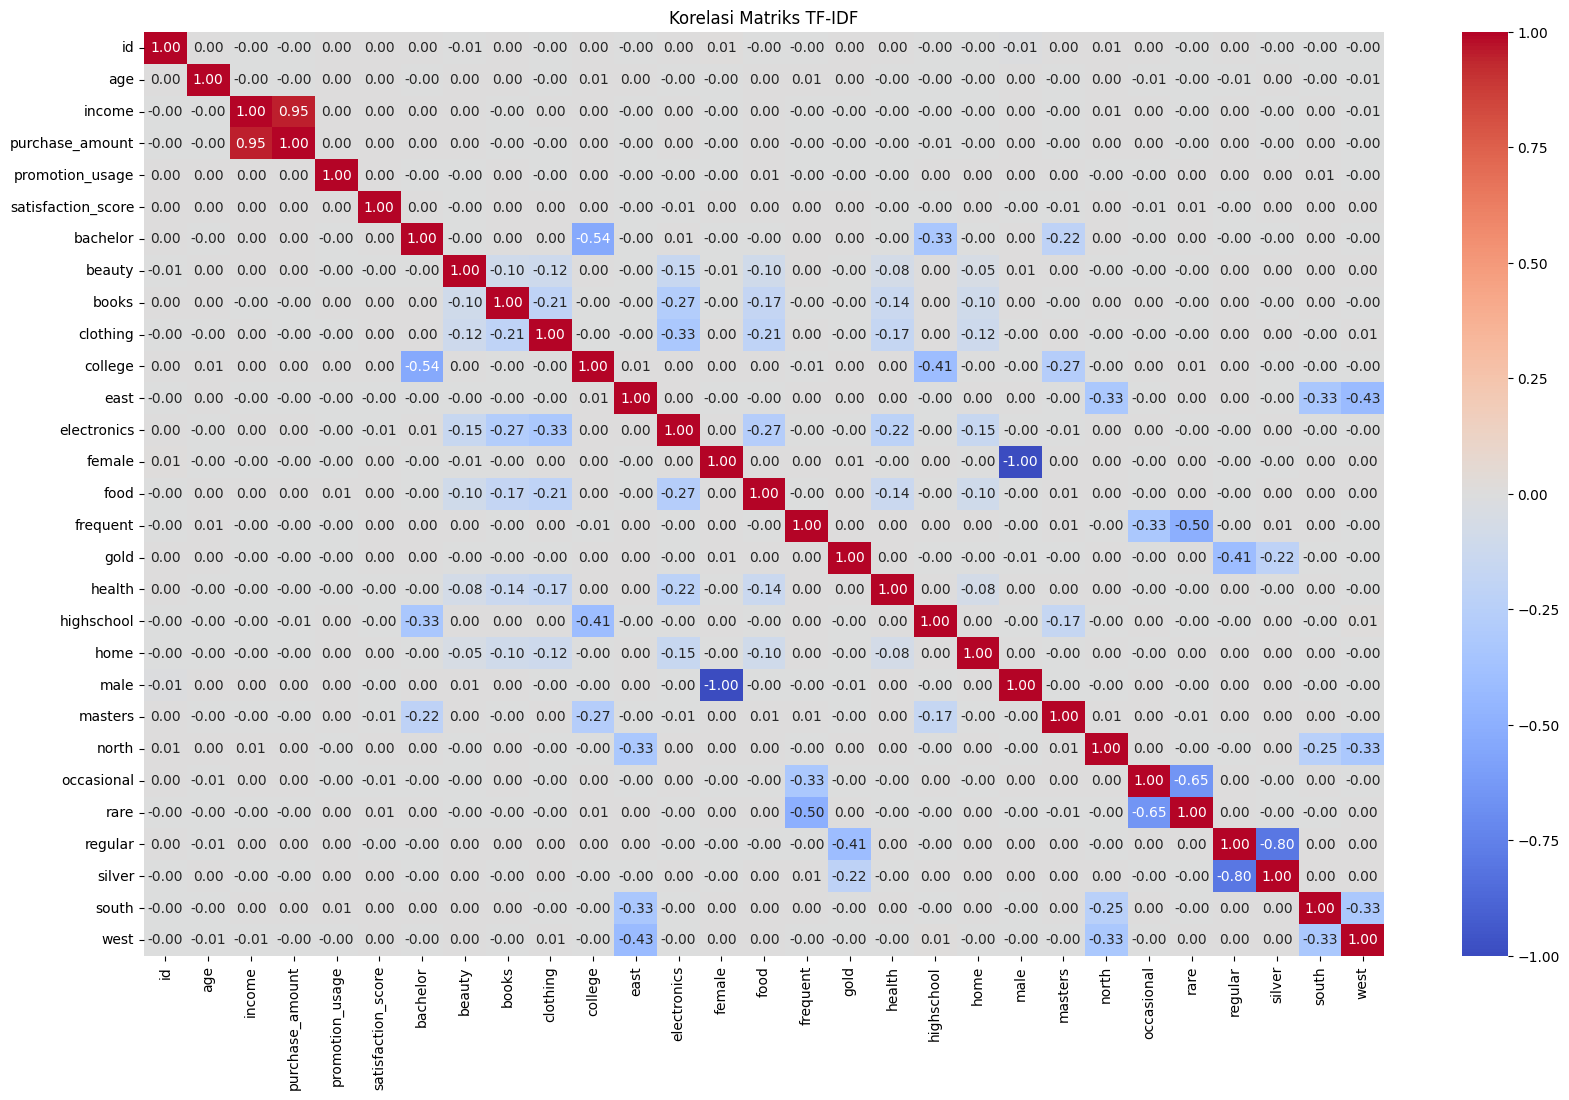

In [ ]:
df_tfidf = pd.read_csv('cus_data_tfidf_manual.csv')

df_tfidf = df_tfidf.loc[:, ~df_tfidf.columns.str.contains('^Unnamed')]

df_tfidf_numeric = df_tfidf.select_dtypes(include=['float64', 'int64'])

print(df_tfidf_numeric.head())

correlation_matrix = df_tfidf_numeric.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

plt.title('Korelasi Matriks TF-IDF')

plt.show()

# **Clustering**

## **K-Means rev**

In [ ]:
df = pd.read_csv('cus_data_bersih.csv')
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,male,40682,bachelor,east,gold,frequent,18249,books,0,6
1,2,29,male,15317,masters,west,regular,rare,4557,clothing,1,6
2,3,37,male,38849,bachelor,west,silver,rare,11822,clothing,0,6
3,4,30,male,11568,highschool,south,regular,frequent,4098,food,0,7
4,5,31,female,46952,college,north,regular,occasional,19685,clothing,1,5


In [ ]:
df.describe()

,id,age,income,purchase_amount,promotion_usage,satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,30.003260,27516.269880,9634.790840,0.300800,5.009650
std,28867.657797,4.480535,12996.782587,4799.339449,0.458608,1.038714
min,1.000000,12.000000,5000.000000,1118.000000,0.000000,0.000000
25%,25000.750000,27.000000,16271.750000,5583.000000,0.000000,4.000000
50%,50000.500000,30.000000,27584.500000,9452.000000,0.000000,5.000000
75%,75000.250000,33.000000,38747.250000,13350.000000,1.000000,6.000000
max,100000.000000,49.000000,50000.000000,26204.000000,1.000000,10.000000


In [ ]:
cleaned_df = df.copy()

In [ ]:
aggregated_df = df.groupby(by="age", as_index=False) \
    .agg(
        MonetaryValue=("purchase_amount", "mean"),
        Frequency=("promotion_usage", "nunique"),
        Satisfaction=("satisfaction_score", "mean")
    )

aggregated_df.head(10)

,age,MonetaryValue,Frequency,Satisfaction
0,12,8455.333333,2,4.333333
1,13,11269.000000,2,5.500000
2,14,8633.846154,2,5.307692
3,15,9166.974359,2,5.179487
4,16,10685.772727,2,5.106061
5,17,10017.699301,2,4.944056
6,18,9345.206009,2,5.047210
7,19,10266.124726,2,4.888403
8,20,9856.582773,2,4.880215
9,21,9570.668071,2,4.981466


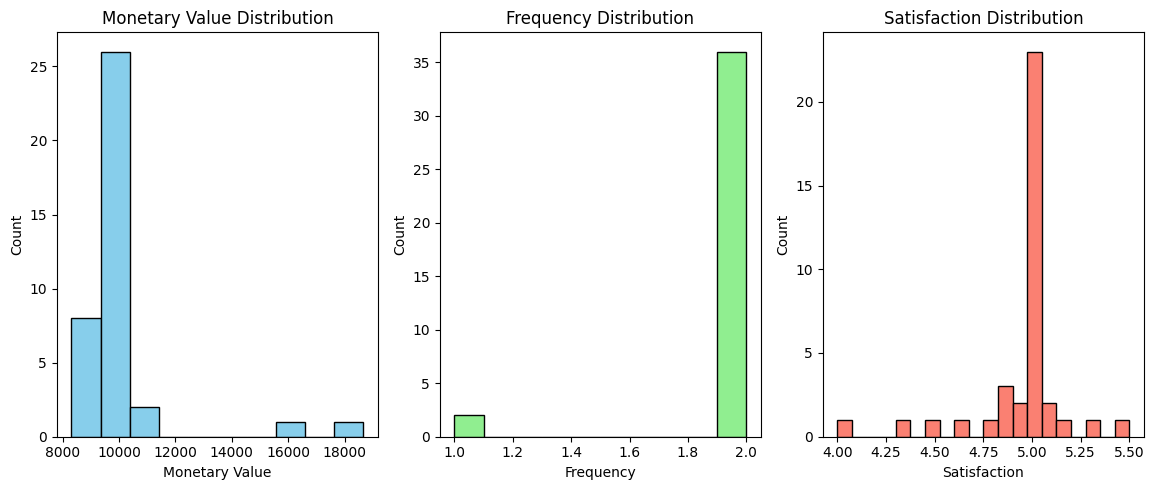

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 2)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 4, 3)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 4, 4)
plt.hist(aggregated_df['Satisfaction'], bins=20, color='salmon', edgecolor='black')
plt.title('Satisfaction Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

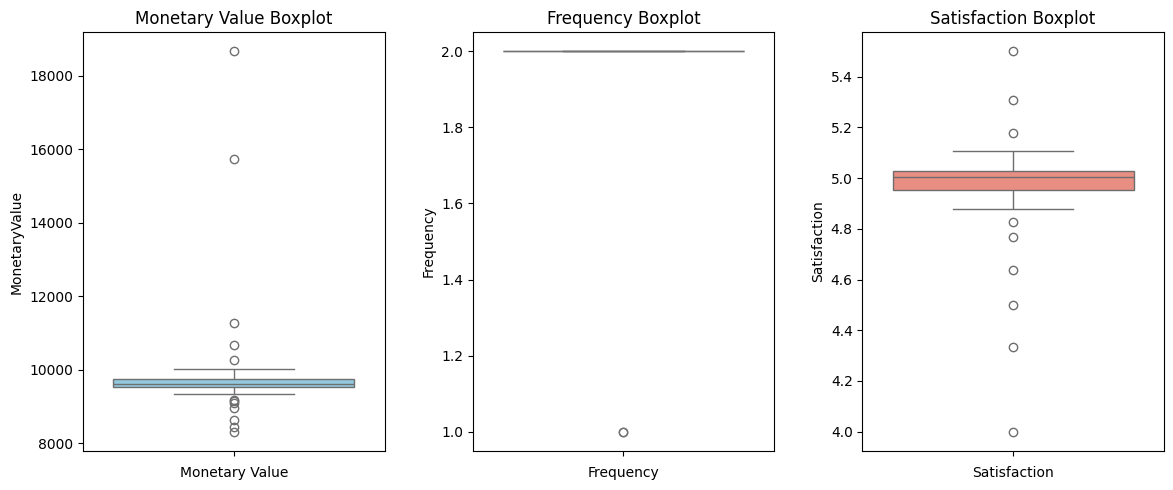

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 2)
sns.boxplot(data=aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 4, 3)
sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 4, 4)
sns.boxplot(data=aggregated_df['Satisfaction'], color='salmon')
plt.title('Satisfaction Boxplot')
plt.xlabel('Satisfaction')

plt.tight_layout()
plt.show()

In [ ]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

,age,MonetaryValue,Frequency,Satisfaction
count,12.000000,12.000000,12.000000,12.000000
mean,30.333333,10700.196140,1.833333,4.865084
std,16.372556,3230.524507,0.389249,0.422696
min,12.000000,8315.153846,1.000000,4.000000
25%,14.750000,8877.750332,2.000000,4.701923
50%,30.500000,9161.357014,2.000000,4.909719
75%,45.500000,10831.579545,2.000000,5.124417
max,49.000000,18666.000000,2.000000,5.500000


In [ ]:
M_Q1 = aggregated_df["Frequency"].quantile(0.25)
M_Q3 = aggregated_df["Frequency"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

frequency_outliers_df = aggregated_df[(aggregated_df["Frequency"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["Frequency"] < (M_Q1 - 1.5 * M_IQR))].copy()

frequency_outliers_df.describe()

,age,MonetaryValue,Frequency,Satisfaction
count,2.000000,2.000000,2.0,2.000000
mean,48.500000,17205.750000,1.0,4.250000
std,0.707107,2065.105354,0.0,0.353553
min,48.000000,15745.500000,1.0,4.000000
25%,48.250000,16475.625000,1.0,4.125000
50%,48.500000,17205.750000,1.0,4.250000
75%,48.750000,17935.875000,1.0,4.375000
max,49.000000,18666.000000,1.0,4.500000


In [ ]:
M_Q1 = aggregated_df["Satisfaction"].quantile(0.25)
M_Q3 = aggregated_df["Satisfaction"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

satisfaction_outliers_df = aggregated_df[(aggregated_df["Satisfaction"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["Satisfaction"] < (M_Q1 - 1.5 * M_IQR))].copy()

satisfaction_outliers_df.describe()

,age,MonetaryValue,Frequency,Satisfaction
count,9.000000,9.000000,9.000000,9.000000
mean,32.111111,10967.528416,1.777778,4.783853
std,17.709069,3713.392711,0.440959,0.482925
min,12.000000,8315.153846,1.000000,4.000000
25%,14.000000,8633.846154,2.000000,4.500000
50%,45.000000,9166.974359,2.000000,4.769231
75%,47.000000,11269.000000,2.000000,5.179487
max,49.000000,18666.000000,2.000000,5.500000


In [ ]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index)) & (~aggregated_df.index.isin(satisfaction_outliers_df.index))]

non_outliers_df.describe()

,age,MonetaryValue,Frequency,Satisfaction
count,25.000000,25.000000,25.0,25.000000
mean,29.960000,9656.066966,2.0,5.002820
std,7.563509,143.197567,0.0,0.033991
min,17.000000,9345.206009,2.0,4.880215
25%,24.000000,9589.517136,2.0,4.995080
50%,30.000000,9616.656000,2.0,5.006449
75%,36.000000,9707.389339,2.0,5.020496
max,43.000000,10017.699301,2.0,5.055866


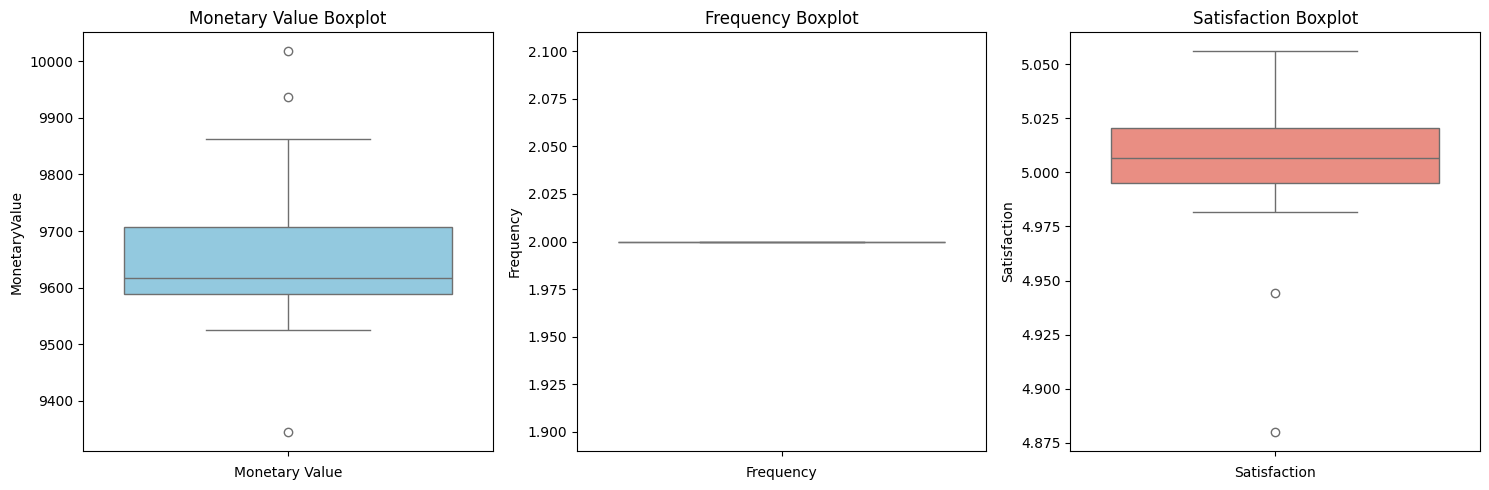

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Satisfaction'], color='salmon')
plt.title('Satisfaction Boxplot')
plt.xlabel('Satisfaction')

plt.tight_layout()
plt.show()

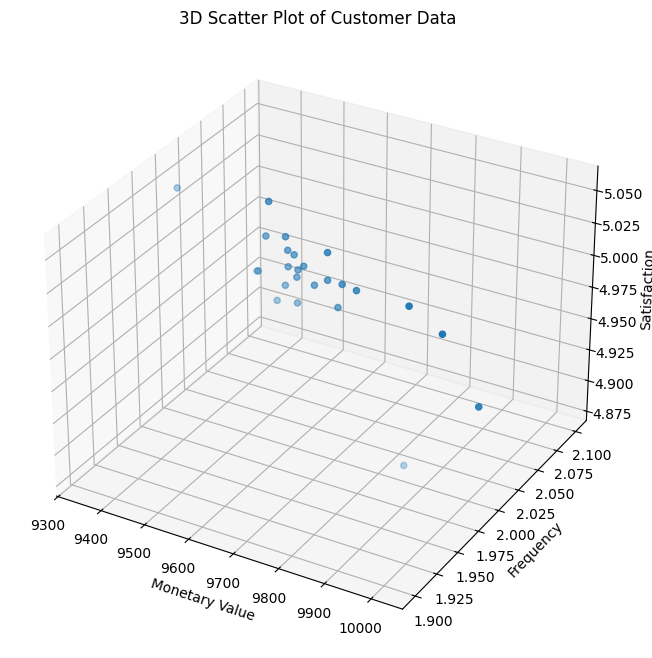

In [ ]:

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Satisfaction"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Satisfaction')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

In [ ]:
def standarisasi(x, mean, std):
    return (x - mean) / std

for col in non_outliers_df.columns:
    mean = non_outliers_df[col].mean()
    std = non_outliers_df[col].std()
    non_outliers_df[col] = (non_outliers_df[col] - non_outliers_df[col].mean()) / non_outliers_df[col].std()

scaled_data =non_outliers_df
scaled_data

<ipython-input-80-308bc0eeccaa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df[col] = (non_outliers_df[col] - non_outliers_df[col].mean()) / non_outliers_df[col].std()


,age,MonetaryValue,Frequency,Satisfaction
5,-1.713490,2.525408,NaN,-1.728839
6,-1.581277,-2.170854,NaN,1.305960
8,-1.316849,1.400274,NaN,-3.607027
9,-1.184635,-0.596371,NaN,-0.628239
10,-1.052422,-0.716164,NaN,1.560608
11,-0.920208,0.643538,NaN,0.106768
12,-0.787994,-0.891924,NaN,-0.074739
13,-0.655780,-0.457087,NaN,0.874274
14,-0.523567,-0.175371,NaN,0.322171
15,-0.391353,0.196937,NaN,0.155846


In [ ]:
non_outliers_df['Frequency'] = non_outliers_df['Frequency'].fillna(2)

<ipython-input-81-09f7bf9d4dbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Frequency'] = non_outliers_df['Frequency'].fillna(2)


In [ ]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Satisfaction"))

scaled_data_df

,MonetaryValue,Frequency,Satisfaction
5,2.525408,2.0,-1.728839
6,-2.170854,2.0,1.305960
8,1.400274,2.0,-3.607027
9,-0.596371,2.0,-0.628239
10,-0.716164,2.0,1.560608
11,0.643538,2.0,0.106768
12,-0.891924,2.0,-0.074739
13,-0.457087,2.0,0.874274
14,-0.175371,2.0,0.322171
15,0.196937,2.0,0.155846


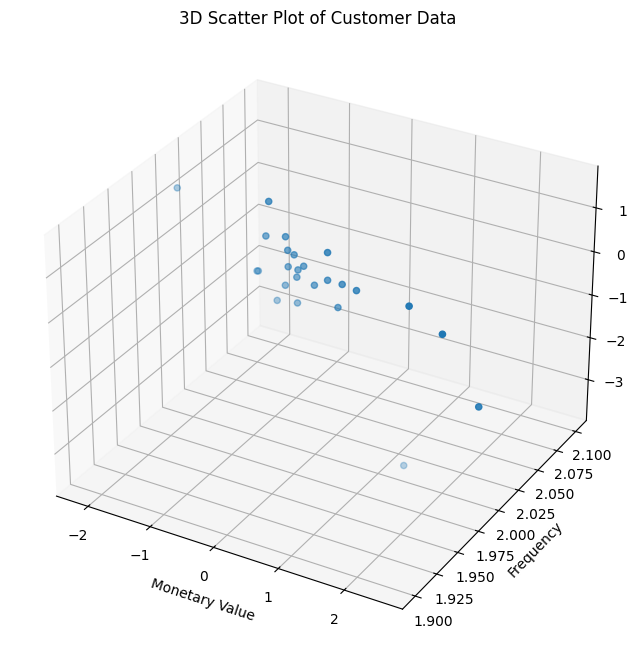

In [ ]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Satisfaction"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Satisfaction')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

In [ ]:
print(scaled_data_df.dtypes)

MonetaryValue    float64
Frequency        float64
Satisfaction     float64
dtype: object


k = 2 ---> inertia = 821.5329 ---> silhouette_score = 0.5655
k = 3 ---> inertia = 165.2004 ---> silhouette_score = 0.7696
k = 4 ---> inertia = 39.6032 ---> silhouette_score = 0.8097
k = 5 ---> inertia = 35.7133 ---> silhouette_score = 0.7395
k = 6 ---> inertia = 29.6591 ---> silhouette_score = 0.7031
k = 7 ---> inertia = 28.5983 ---> silhouette_score = 0.6966


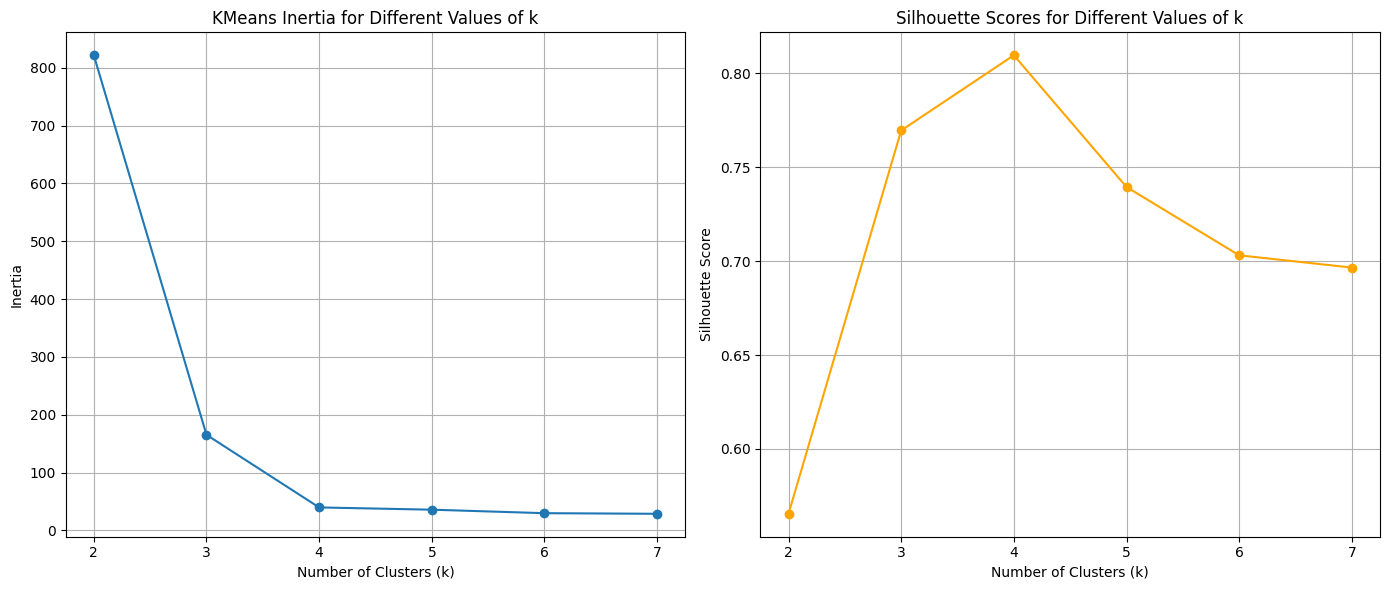

In [ ]:
def KMeans(k, data, max_iter=100):
    n_samples, n_features = data.shape
    centroids = data[np.random.choice(n_samples, k, replace=False)]
    clusters = np.zeros(n_samples, dtype=int)

    for _ in range(max_iter):
        for i in range(n_samples):
            distances = np.linalg.norm(data[i] - centroids, axis=1)
            clusters[i] = np.argmin(distances)

        new_centroids = np.zeros_like(centroids)
        for cluster_id in range(k):
            points_in_cluster = data[clusters == cluster_id]
            if len(points_in_cluster) > 0:
                new_centroids[cluster_id] = np.mean(points_in_cluster, axis=0)
            else:
                new_centroids[cluster_id] = centroids[cluster_id]

        if np.allclose(centroids, new_centroids, atol=1e-6):
            break
        centroids = new_centroids

    return clusters, centroids

def silhouette_score(data, cluster_labels):
    n_samples = data.shape[0]
    silhouette_scores = []
    unique_labels = np.unique(cluster_labels)

    for i in range(n_samples):
        same_cluster = data[cluster_labels == cluster_labels[i]]
        other_clusters = [data[cluster_labels == label] for label in unique_labels if label != cluster_labels[i]]

        a = np.mean(np.linalg.norm(data[i] - same_cluster, axis=1)) if len(same_cluster) > 1 else 0
        b = np.min([np.mean(np.linalg.norm(data[i] - cluster, axis=1)) for cluster in other_clusters]) if other_clusters else 0

        silhouette_scores.append((b - a) / max(a, b) if max(a, b) > 0 else 0)

    return np.mean(silhouette_scores)


def calculate_inertia(data, cluster_labels, centroids):
    inertia = 0
    for i, centroid in enumerate(centroids):
        cluster_points = data[cluster_labels == i]
        inertia += np.sum((cluster_points - centroid) ** 2)
    return inertia


data, _ = make_blobs(n_samples=25, centers=4, cluster_std=1.0, random_state=42)

scaled_data_df = np.array(data)

max_k = 7
inertia_values = []
silhouette_scores_list = []
k_values = range(2, max_k + 1)

for k in k_values:
    clusters, centroids = KMeans(k, scaled_data_df)
    inertia = calculate_inertia(scaled_data_df, clusters, centroids)
    sil_score = silhouette_score(scaled_data_df, clusters)

    inertia_values.append(inertia)
    silhouette_scores_list.append(sil_score)

    print(f"k = {k} ---> inertia = {inertia:.4f} ---> silhouette_score = {sil_score:.4f}")


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o', label='Inertia')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores_list, marker='o', color='orange', label='Silhouette Score')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
def input_k():
    max_k = 7
    while True:
        try:
            k = int(input(f"Masukkan nilai k (1-{max_k}): "))
            if 1 <= k <= max_k:
                print(f"Nilai k yang dipilih: {k}")
                return k
            else:
                print(f"Harap masukkan angka antara 1 dan {max_k}.")
        except ValueError:
            print("Input tidak valid. Harap masukkan angka.")

k = input_k()

Masukkan nilai k (1-7): 3
Nilai k yang dipilih: 3


In [ ]:
cluster_labels, centroids = KMeans(k, scaled_data_df)
cluster_labels

array([1, 2, 0, 1, 1, 0, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2,
       0, 2, 2])

In [ ]:
non_outliers_df["Cluster"] = cluster_labels
non_outliers_df

<ipython-input-88-27c1cd6acdfb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,age,MonetaryValue,Frequency,Satisfaction,Cluster
5,-1.713490,2.525408,2.0,-1.728839,1
6,-1.581277,-2.170854,2.0,1.305960,2
8,-1.316849,1.400274,2.0,-3.607027,0
9,-1.184635,-0.596371,2.0,-0.628239,1
10,-1.052422,-0.716164,2.0,1.560608,1
11,-0.920208,0.643538,2.0,0.106768,0
12,-0.787994,-0.891924,2.0,-0.074739,2
13,-0.655780,-0.457087,2.0,0.874274,2
14,-0.523567,-0.175371,2.0,0.322171,1
15,-0.391353,0.196937,2.0,0.155846,2


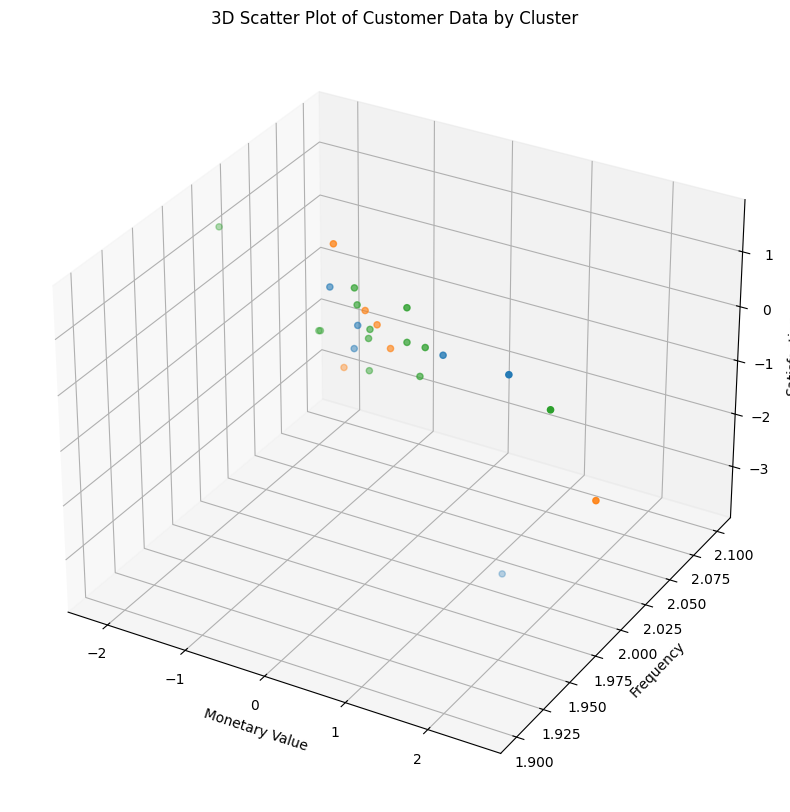

In [ ]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'],
                     non_outliers_df['Frequency'],
                     non_outliers_df['Satisfaction'],
                     c=colors,
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Satisfaction')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

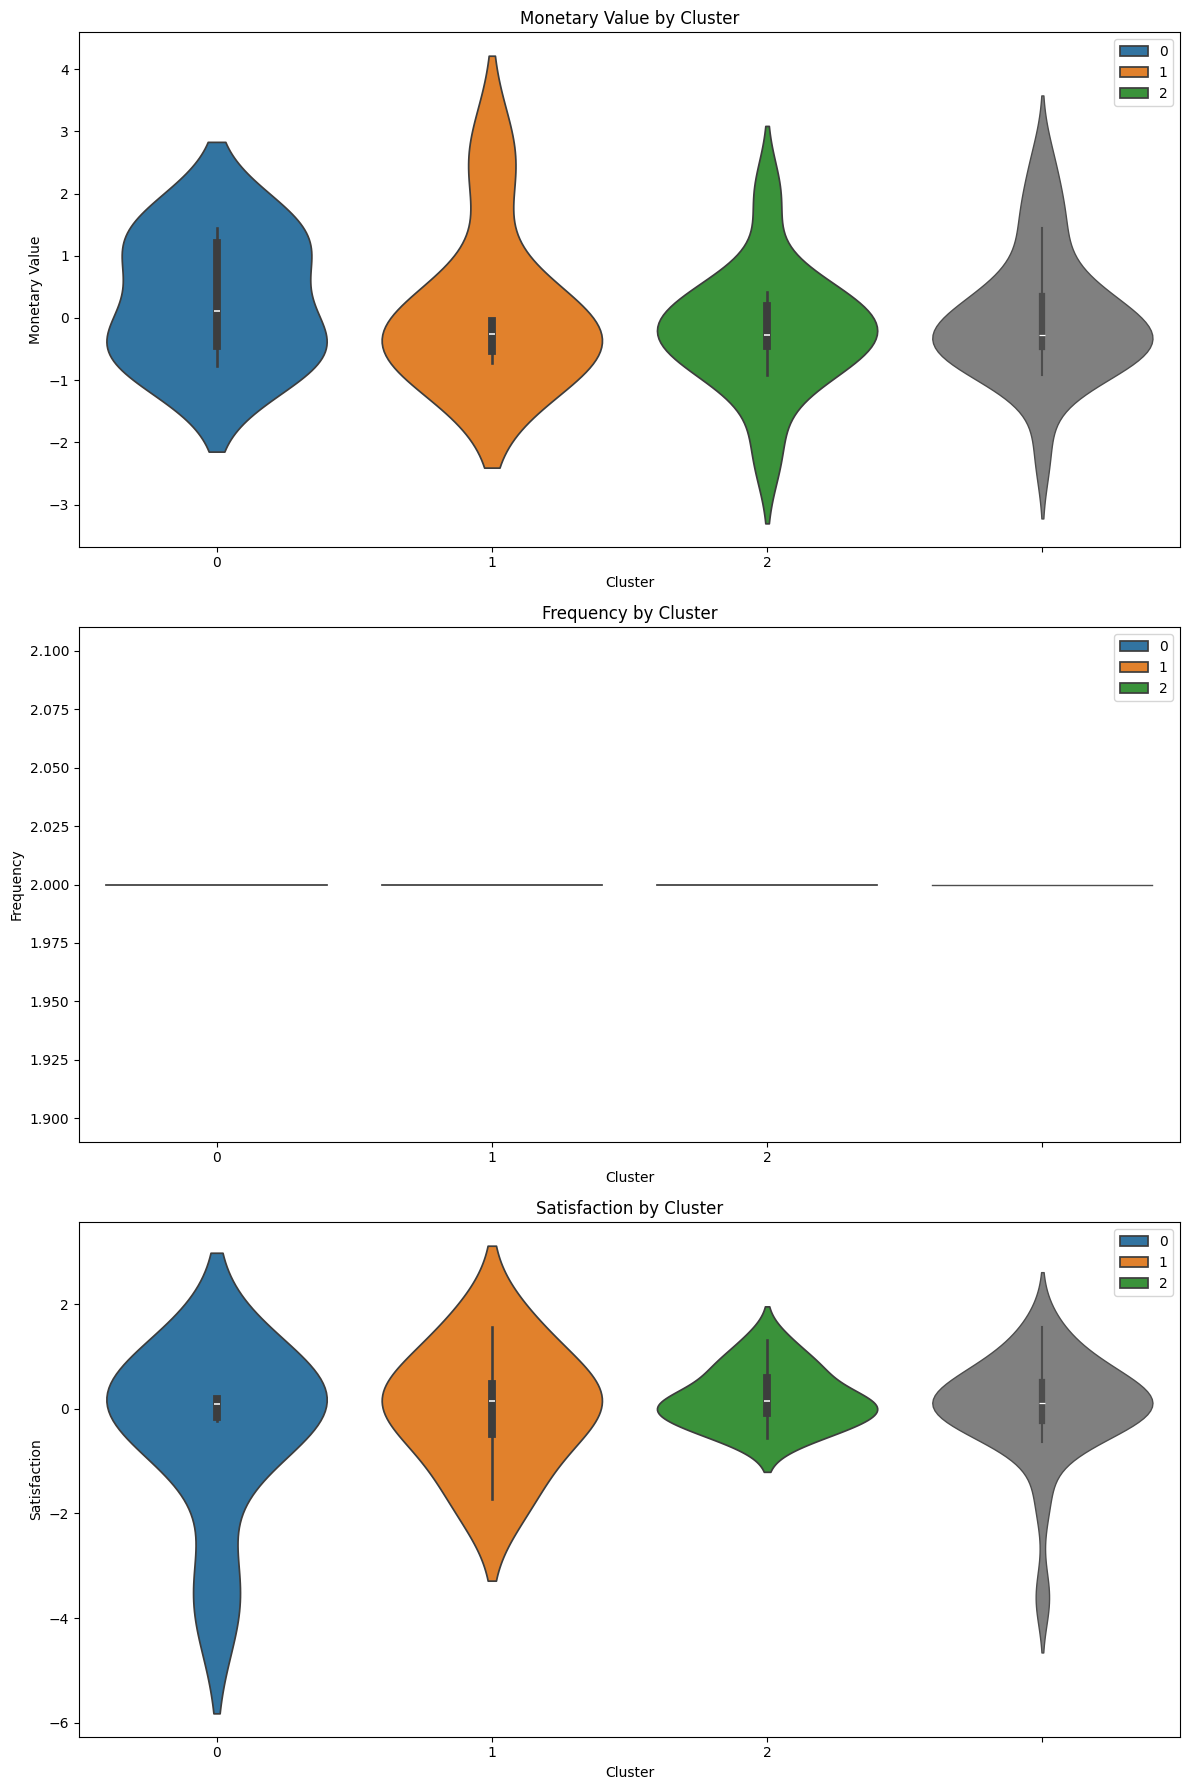

In [ ]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Satisfaction'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Satisfaction'], color='gray', linewidth=1.0)
plt.title('Satisfaction by Cluster')
plt.ylabel('Satisfaction')

plt.tight_layout()
plt.show()

In [ ]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

,age,MonetaryValue,Frequency,Satisfaction,Cluster
0,12,8455.333333,2,4.333333,-1
1,13,11269.000000,2,5.500000,-1
2,14,8633.846154,2,5.307692,-1
3,15,9166.974359,2,5.179487,-1
4,16,10685.772727,2,5.106061,-1
7,19,10266.124726,2,4.888403,-1
30,42,9155.739669,2,5.037190,-1
32,44,8959.051724,2,4.931034,-1
33,45,9083.857143,2,4.828571,-1
35,47,8315.153846,2,4.769231,-1


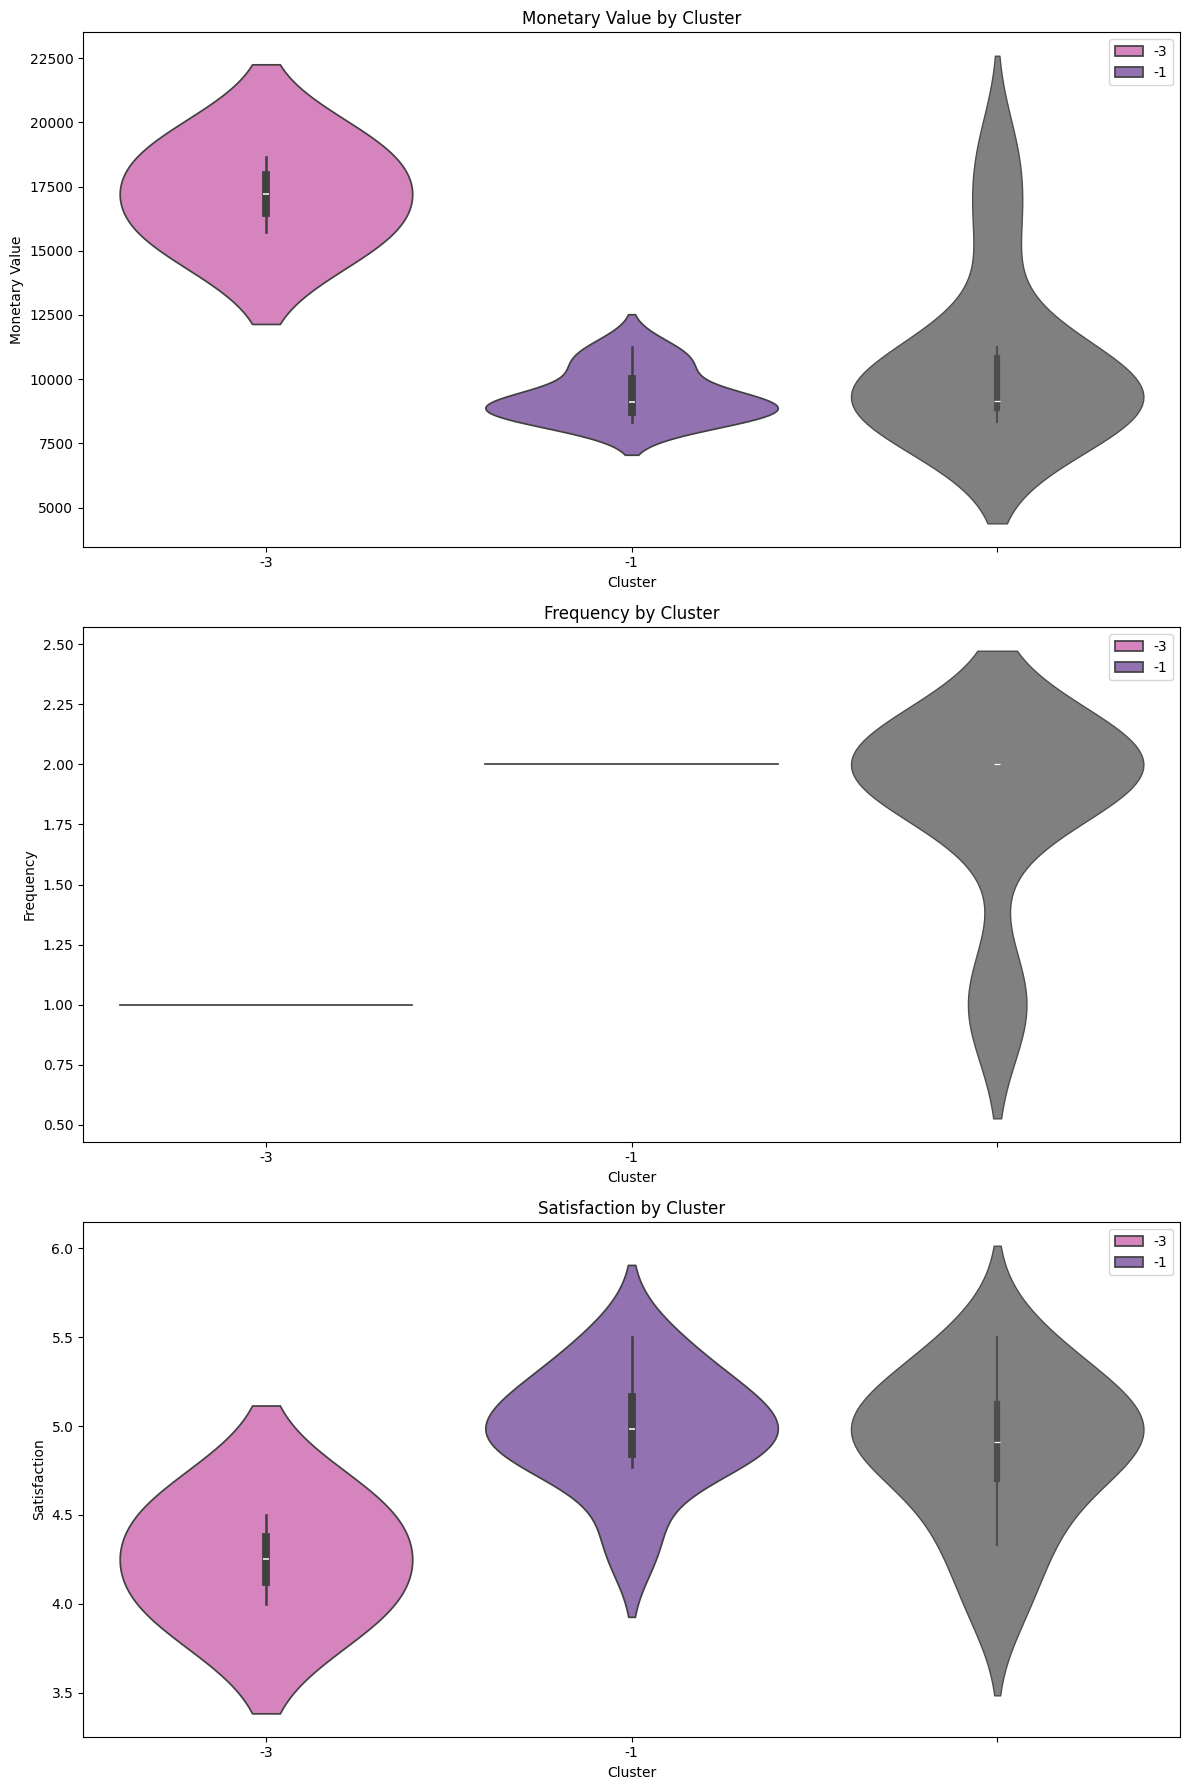

In [ ]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Satisfaction'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Satisfaction'], color='gray', linewidth=1.0)
plt.title('Satisfaction by Cluster')
plt.ylabel('Satisfaction')

plt.tight_layout()
plt.show()

In [ ]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [ ]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,age,MonetaryValue,Frequency,Satisfaction,Cluster
5,-1.713490,2.525408,2.0,-1.728839,1
6,-1.581277,-2.170854,2.0,1.305960,2
8,-1.316849,1.400274,2.0,-3.607027,0
9,-1.184635,-0.596371,2.0,-0.628239,1
10,-1.052422,-0.716164,2.0,1.560608,1
11,-0.920208,0.643538,2.0,0.106768,0
12,-0.787994,-0.891924,2.0,-0.074739,2
13,-0.655780,-0.457087,2.0,0.874274,2
14,-0.523567,-0.175371,2.0,0.322171,1
15,-0.391353,0.196937,2.0,0.155846,2


In [ ]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df.to_csv("full_clustering_df.csv", index=False)
full_clustering_df

,age,MonetaryValue,Frequency,Satisfaction,Cluster,ClusterLabel
5,-1.713490,2.525408,2.0,-1.728839,1,RE-ENGAGE
6,-1.581277,-2.170854,2.0,1.305960,2,NURTURE
8,-1.316849,1.400274,2.0,-3.607027,0,RETAIN
9,-1.184635,-0.596371,2.0,-0.628239,1,RE-ENGAGE
10,-1.052422,-0.716164,2.0,1.560608,1,RE-ENGAGE
11,-0.920208,0.643538,2.0,0.106768,0,RETAIN
12,-0.787994,-0.891924,2.0,-0.074739,2,NURTURE
13,-0.655780,-0.457087,2.0,0.874274,2,NURTURE
14,-0.523567,-0.175371,2.0,0.322171,1,RE-ENGAGE
15,-0.391353,0.196937,2.0,0.155846,2,NURTURE


In [ ]:
max_value = full_clustering_df['MonetaryValue'].max()
max_row = full_clustering_df[full_clustering_df['MonetaryValue'] == max_value]
max_row

,age,MonetaryValue,Frequency,Satisfaction,Cluster,ClusterLabel
37,49.0,18666.0,1.0,4.0,-3,DELIGHT


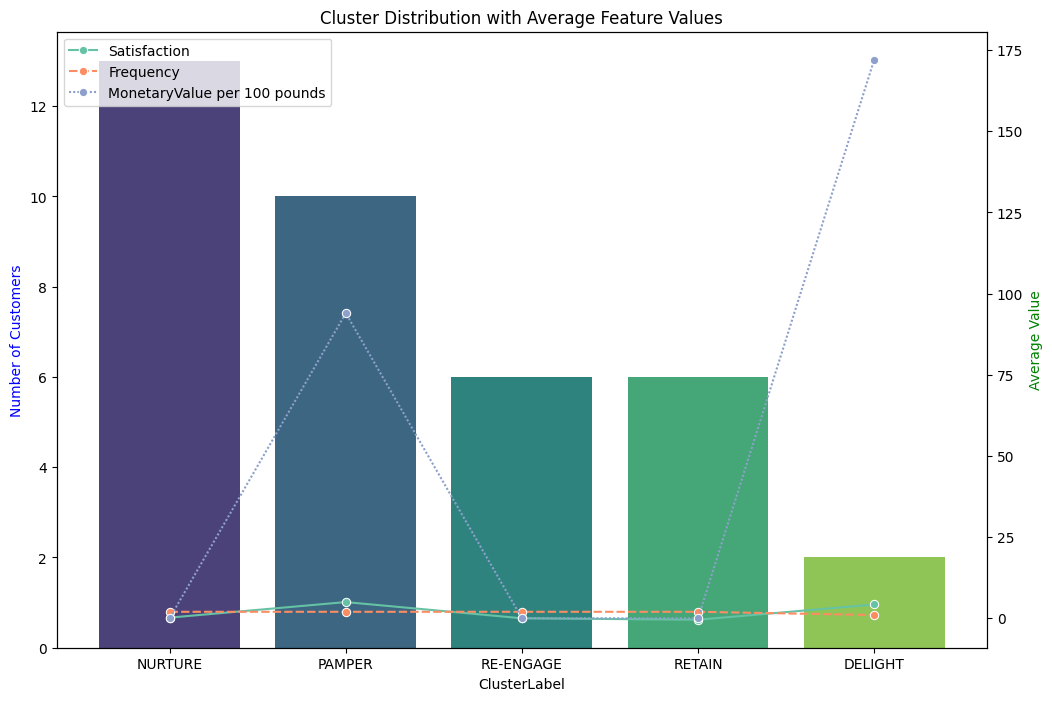

In [ ]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Satisfaction', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()

# **KNN**

In [ ]:
df_knn = pd.read_csv('full_clustering_df.csv')
df_knn.head(3)

In [ ]:
df_knn.drop(columns=['Cluster'], inplace=True)
df_knn.head(3)

,age,MonetaryValue,Frequency,Satisfaction,ClusterLabel,MonetaryValue per 100 pounds
5,-1.713490,2.525408,2.0,-1.728839,RE-ENGAGE,0.025254
6,-1.581277,-2.170854,2.0,1.305960,NURTURE,-0.021709
8,-1.316849,1.400274,2.0,-3.607027,RETAIN,0.014003


In [ ]:
label_encoder = LabelEncoder()
df_knn['ClusterLabelEncode'] = label_encoder.fit_transform(df_knn['ClusterLabel'])
df_knn.head(3)

,age,MonetaryValue,Frequency,Satisfaction,ClusterLabel,MonetaryValue per 100 pounds,ClusterLabelEncode
5,-1.713490,2.525408,2.0,-1.728839,RE-ENGAGE,0.025254,3
6,-1.581277,-2.170854,2.0,1.305960,NURTURE,-0.021709,1
8,-1.316849,1.400274,2.0,-3.607027,RETAIN,0.014003,4


In [ ]:
label_mapping = df_knn[['ClusterLabelEncode', 'ClusterLabel']].drop_duplicates().set_index('ClusterLabelEncode')['ClusterLabel'].to_dict()

In [ ]:
label_mapping

{3: 'RE-ENGAGE', 1: 'NURTURE', 4: 'RETAIN', 2: 'PAMPER', 0: 'DELIGHT'}

In [ ]:
df_knn.drop(columns=['ClusterLabel'], inplace=True)

## **Split Data & Training Model**

In [ ]:
X = df_knn[["age", "MonetaryValue", "Frequency", "Satisfaction"]].values
y = df_knn["ClusterLabelEncode"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def manhattan_distance(point1, point2):
    return np.sum(np.abs(np.array(point1) - np.array(point2)))

def knn_fit_predict(X_train, y_train, X_test, k=3):
    predictions = []
    for test_point in X_test:
        distances = [manhattan_distance(test_point, train_point) for train_point in X_train]
        k_indices = np.argsort(distances)[:k]

        k_labels = [y_train[i] for i in k_indices]
        most_common = Counter(k_labels).most_common(1)[0][0]
        predictions.append(most_common)

    return predictions

def accuracy_score(y_true, y_pred):
    correct = sum(y_t == y_p for y_t, y_p in zip(y_true, y_pred))
    return correct / len(y_true)

def classification_report(y_true, y_pred):
    classes = sorted(set(y_true))
    report = "Class\tPrecision\tRecall\tF1-Score\n"
    for cls in classes:
        tp = sum((y_t == cls) and (y_p == cls) for y_t, y_p in zip(y_true, y_pred))
        fp = sum((y_t != cls) and (y_p == cls) for y_t, y_p in zip(y_true, y_pred))
        fn = sum((y_t == cls) and (y_p != cls) for y_t, y_p in zip(y_true, y_pred))
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        report += f"{cls}\t{precision:.2f}\t\t{recall:.2f}\t\t{f1_score:.2f}\n"
    return report

In [ ]:
k = 3
y_pred = knn_fit_predict(X_train, y_train, X_test, k)

KNN_acc = accuracy_score(y_test, y_pred)
print("Prediksi:", y_pred)
print("Akurasi KNN: {:.2f}%".format(KNN_acc * 100))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Prediksi: [1, 1, 1, 2, 2, 2, 3, 2]
Akurasi KNN: 50.00%

Laporan Klasifikasi:
Class	Precision	Recall	F1-Score
0	0.00		0.00		0.00
1	0.33		0.50		0.40
2	0.75		1.00		0.86
3	0.00		0.00		0.00
4	0.00		0.00		0.00



## **Implementasi**

In [ ]:
age = int(input("Silakan masukkan usia: "))
monetary_value = int(input("Silakan masukkan Monetary Value: "))
frequency = int(input("Silakan masukkan Frequency: "))
satisfaction = int(input("Silakan masukkan Satisfaction: "))

testing = pd.DataFrame({
    'age': [age],
    'MonetaryValue': [monetary_value],
    'Frequency': [frequency],
    'Satisfaction': [satisfaction]
})
testing

Silakan masukkan usia: 23
Silakan masukkan Monetary Value: 200
Silakan masukkan Frequency: 2
Silakan masukkan Satisfaction: 6


,age,MonetaryValue,Frequency,Satisfaction
0,23,200,2,6


In [ ]:
try:
    pred_coba = knn_fit_predict(X_train, y_train, testing.values, k=3)
    predicted_label = label_mapping.get(pred_coba[0], "Unknown")
    print("Hasil Prediksi dari Pelanggan:", predicted_label)

except Exception as e:
    print("Terjadi kesalahan:", e)


Hasil Prediksi dari Pelanggan: NURTURE
